In [1]:
import pickle
import random

import numpy as np
import cv2

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:

pickle_in = open("X.pickle","rb")
XRAW = pickle.load( pickle_in )
pickle_in.close()

pickle_in = open("Y.pickle","rb")
Y = pickle.load( pickle_in )
pickle_in.close()




# YOU MIGHT WANT TO TRANSFORM THE DATA .... 
# ..... NORMALIZE or STANDARDIZE IT

In [3]:
# YOU MIGHT WANT TO TRANSFORM THE DATA .... NORMALIZE or STANDARDIZE IT ?

X = XRAW / 255.0

#print( XRAW[0] )
print( X[0] )

[[[0.01568627]
  [0.02352941]
  [0.02352941]
  ...
  [0.02352941]
  [0.02745098]
  [0.02745098]]

 [[0.01568627]
  [0.02352941]
  [0.02352941]
  ...
  [0.03921569]
  [0.02745098]
  [0.03529412]]

 [[0.02745098]
  [0.02745098]
  [0.02745098]
  ...
  [0.02352941]
  [0.03529412]
  [0.03529412]]

 ...

 [[0.10588235]
  [0.15686275]
  [0.14901961]
  ...
  [0.02352941]
  [0.01176471]
  [0.03529412]]

 [[0.16862745]
  [0.19607843]
  [0.12156863]
  ...
  [0.01568627]
  [0.02745098]
  [0.01960784]]

 [[0.16470588]
  [0.15294118]
  [0.14901961]
  ...
  [0.01176471]
  [0.01960784]
  [0.01568627]]]


In [4]:

print( Y.shape )

Z = X[0]
print( X.shape )
print( Z.shape )


(10028,)
(10028, 80, 80, 1)
(80, 80, 1)


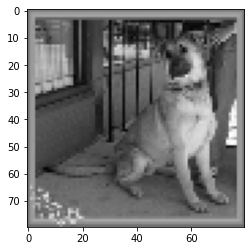

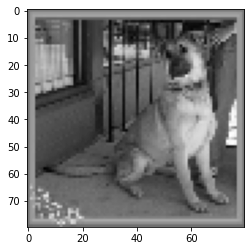

In [5]:
WHO = 100

IMG_SIZE = Z.shape[0]

IMG = XRAW[WHO]
IMG = cv2.resize( IMG, (IMG_SIZE, IMG_SIZE) )
plt.imshow( IMG , cmap="gray" )
plt.show()


IMG = X[WHO]
IMG = cv2.resize( IMG, (IMG_SIZE, IMG_SIZE) )
plt.imshow( IMG , cmap="gray" )
plt.show()


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

In [7]:
"""
MODEL ACCURACY METRICS
"""

def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]


def print_ROC_Curve( TITLE, LIST ) :
    pass
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )


# FEEL FREE TO TRY REGULAR NEURAL NETWORK 
# TO SEE HOW IT WILL DO ....

In [8]:


A_theShapeSize = Z.shape
A_theActivation = tf.keras.activations.relu
A_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
A_theOptimizer = tf.keras.optimizers.Adam()
A_theEpochs = 50

A_theUnits = int( 2 * Z.shape[0] * Z.shape[1] )


In [9]:
A_LAYER_FLATTEN = tf.keras.layers.Flatten( input_shape=A_theShapeSize )
A_LAYER_DENSE_01 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
A_LAYER_DENSE_02 = tf.keras.layers.Dense( units=A_theUnits, activation=A_theActivation )
A_LAYER_OUT = tf.keras.layers.Dense(2, activation=tf.nn.softmax )

model_A = tf.keras.models.Sequential()
model_A.add( A_LAYER_FLATTEN )
model_A.add( A_LAYER_DENSE_01 )
model_A.add( A_LAYER_DROP )
model_A.add( A_LAYER_DENSE_02 )
model_A.add( A_LAYER_OUT )
model_A.compile( optimizer = A_theOptimizer, loss=A_theLossMetric, metrics=['accuracy'] )
          
model_A.fit( X_train, Y_train, epochs=A_theEpochs, validation_split=0.1, batch_size=32 )


2022-08-27 10:32:33.061808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
226/226 [==============================] - 382s 2s/step - loss: 3.6145 - accuracy: 0.5142 - val_loss: 0.6940 - val_accuracy: 0.5293
Epoch 2/50
226/226 [==============================] - 334s 1s/step - loss: 0.6853 - accuracy: 0.5613 - val_loss: 0.6848 - val_accuracy: 0.5567
Epoch 3/50
226/226 [==============================] - 351s 2s/step - loss: 0.6740 - accuracy: 0.5763 - val_loss: 0.7145 - val_accuracy: 0.5479
Epoch 4/50
226/226 [==============================] - 247s 1s/step - loss: 0.6752 - accuracy: 0.5742 - val_loss: 0.6964 - val_accuracy: 0.5342
Epoch 5/50
226/226 [==============================] - 276s 1s/step - loss: 0.6786 - accuracy: 0.5707 - val_loss: 0.6993 - val_accuracy: 0.5205
Epoch 6/50
226/226 [==============================] - 332s 1s/step - loss: 0.6776 - accuracy: 0.5740 - val_loss: 0.6992 - val_accuracy: 0.5604
Epoch 7/50
226/226 [==============================] - 248s 1s/step - loss: 0.6873 - accuracy: 0.5637 - val_loss: 0.6922 - val_accuracy: 0.5492

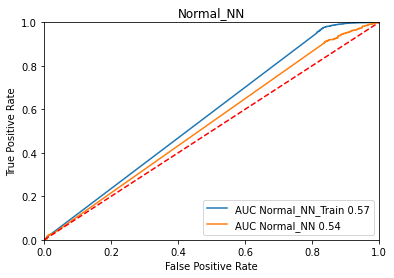

Normal_NN CLASSIFICATION ACCURACY
Normal_NN_Train  =  0.5680628272251309
Normal_NN  =  0.5413758723828515
------




In [10]:
WHO = "Normal_NN"

TRAIN_RES = get_TF_ProbAccuracyScores( WHO + "_Train", model_A, X_train, Y_train )
TEST_RES = get_TF_ProbAccuracyScores( WHO, model_A, X_test, Y_test )

print_ROC_Curve( WHO, [ TRAIN_RES, TEST_RES ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_RES, TEST_RES ] )


# CONVOLUTIONAL NEURAL NETWORK HERE

In [11]:
B_theShapeSize = Z.shape
B_theActivation = tf.keras.activations.relu
B_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
B_theOptimizer = tf.keras.optimizers.Adam()

# Fill in the values you believe will give the best results
B_theEpochs = 20
B_theUnits = int( 2 * Z.shape[0] * Z.shape[1] )
B_theUnits = 32

In [12]:
# Convolutional Neural Network

B_LAYER_CONV2D_01 = tf.keras.layers.Conv2D( B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_01 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )


B_LAYER_CONV2D_02 = tf.keras.layers.Conv2D( 2 * B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_02 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )


B_LAYER_CONV2D_03 = tf.keras.layers.Conv2D( 4 * B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_03 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )


B_LAYER_CONV2D_04 = tf.keras.layers.Conv2D( 4 * B_theUnits, (3,3), activation=B_theActivation, input_shape=B_theShapeSize  )
B_LAYER_POOL_04 = tf.keras.layers.MaxPooling2D( pool_size=(2,2) )



B_LAYER_FLATTEN = tf.keras.layers.Flatten()

B_LAYER_DENSE_01 = tf.keras.layers.Dense( units=8*B_theUnits, activation=B_theActivation )
B_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
B_LAYER_DENSE_02 = tf.keras.layers.Dense( units=B_theUnits, activation=B_theActivation )

B_LAYER_OUT = tf.keras.layers.Dense(2, activation=tf.nn.softmax )



model_B = tf.keras.models.Sequential()

model_B.add( B_LAYER_CONV2D_01 )
model_B.add( B_LAYER_POOL_01 )

model_B.add( B_LAYER_CONV2D_02 )
model_B.add( B_LAYER_POOL_02 )

model_B.add( B_LAYER_CONV2D_03 )
model_B.add( B_LAYER_POOL_03 )

model_B.add( B_LAYER_CONV2D_04 )
model_B.add( B_LAYER_POOL_04 )

model_B.add( B_LAYER_FLATTEN )

model_B.add( B_LAYER_DENSE_01 )
model_B.add( B_LAYER_DROP )

model_B.add( B_LAYER_DENSE_02 )
model_B.add( B_LAYER_OUT )

model_B.compile( optimizer = B_theOptimizer, loss=B_theLossMetric, metrics=['accuracy'] )
model_B.fit( X_train, Y_train, epochs=B_theEpochs )



Epoch 1/20
251/251 [==============================] - 22s 86ms/step - loss: 0.6852 - accuracy: 0.5516
Epoch 2/20
251/251 [==============================] - 22s 88ms/step - loss: 0.6355 - accuracy: 0.6483
Epoch 3/20
251/251 [==============================] - 22s 88ms/step - loss: 0.5759 - accuracy: 0.7066
Epoch 4/20
251/251 [==============================] - 22s 86ms/step - loss: 0.5040 - accuracy: 0.7584
Epoch 5/20
251/251 [==============================] - 22s 86ms/step - loss: 0.4434 - accuracy: 0.7946
Epoch 6/20
251/251 [==============================] - 22s 86ms/step - loss: 0.3923 - accuracy: 0.8190
Epoch 7/20
251/251 [==============================] - 22s 88ms/step - loss: 0.3256 - accuracy: 0.8621
Epoch 8/20
251/251 [==============================] - 22s 86ms/step - loss: 0.2716 - accuracy: 0.8878
Epoch 9/20
251/251 [==============================] - 22s 87ms/step - loss: 0.2218 - accuracy: 0.9101
Epoch 10/20
251/251 [==============================] - 22s 87ms/step - loss: 0.168

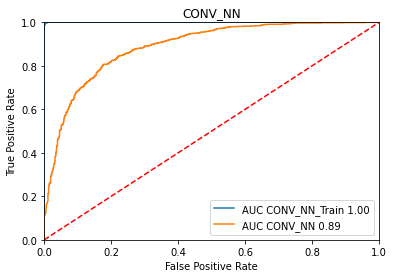

CONV_NN CLASSIFICATION ACCURACY
CONV_NN_Train  =  0.9967589129892794
CONV_NN  =  0.8130608175473579
------




In [13]:
WHO = "CONV_NN"

TRAIN_RES = get_TF_ProbAccuracyScores( WHO + "_Train", model_B, X_train, Y_train )
TEST_RES = get_TF_ProbAccuracyScores( WHO, model_B, X_test, Y_test )

print_ROC_Curve( WHO, [ TRAIN_RES, TEST_RES ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_RES, TEST_RES ] )


In [14]:
tf.keras.models.save_model( model_B, "TFNN.pet.model")

2022-08-27 16:01:18.091464: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: TFNN.pet.model/assets
